In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#Define epochs for all models.
epochs = 10

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/project.kaggle"

In [ ]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  deepglobe-road-extraction-dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  butterfly-image-classification.zip
replace Testing_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: butterfly_test.csv
  inflating: butterfly_test.csv      
replace Training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: butterfly_train.csv
  inflating: butterfly_train.csv     
replace test/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/Image_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/Image_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/Image_1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

1 archive was successfully processed.
1 file had no zipfile directory.


In [ ]:
train_csv = pd.read_csv('/content/drive/MyDrive/butterfly_train.csv')
test_csv = pd.read_csv('/content/drive/MyDrive/butterfly_test.csv')

In [ ]:
train_csv.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [ ]:
train_csv['label'].unique()

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SN

In [ ]:
test_csv.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
def shape_of_ds(df, ds_name='df'):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")

def check_null(df, ds_name='df'):
    print(f"Number of null values in the {ds_name} dataset: ")
    print(df.isnull().sum())

def unique_vals(df, ds_name='df'):
    print(f"Number of unique values in {ds_name} dataset: ")
    print(df.nunique())

def seperator(sep=50):
    print("-"*sep)

In [ ]:
shape_of_ds(train_csv, "Train")
shape_of_ds(test_csv, "Test")

Train dataset has 6499 rows and 2 columns
Test dataset has 2786 rows and 1 columns


In [ ]:
check_null(train_csv, 'Train')

Number of null values in the Train dataset: 
filename    0
label       0
dtype: int64


In [ ]:
check_null(test_csv, 'Test')

Number of null values in the Test dataset: 
filename    0
dtype: int64


In [ ]:
unique_vals(train_csv, 'Train')

Number of unique values in Train dataset: 
filename    6499
label         75
dtype: int64


In [ ]:
unique_vals(test_csv, 'Test')

Number of unique values in Test dataset: 
filename    2786
dtype: int64


In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
def read_image(path):
    try:
        img = Image.open(path)
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))
        x = np.array(img, dtype=np.float32)
        x = x / 255.0
        return x
    except Exception as e:
        print(f"Error while reading image: {e}")
        return None

Label: SOUTHERN DOGFACE


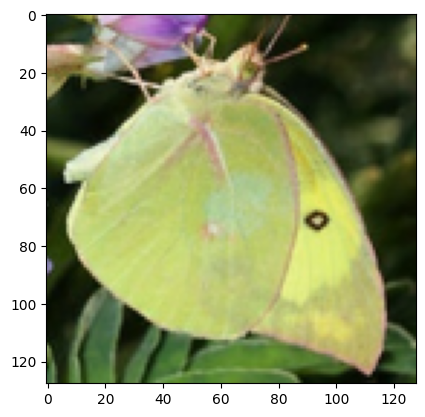

In [ ]:
import csv
import os
from PIL import Image

drive_path = '/content/drive/MyDrive/train'  # Adjust the path to your Google Drive folder
csv_file = '/content/drive/MyDrive/butterfly_train.csv'  # Replace with the actual CSV file path

with open(csv_file, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        file_name = row['filename']
        label = row['label']
        image_file_path = os.path.join(drive_path, file_name)  # Combine the drive path and filename
        image = read_image(image_file_path)  # Load the image using PIL
        plt.imshow(image)  # Display the image
        print("Label:", label)  # Print the label
        break



In [60]:
import csv
import os
import numpy as np
from PIL import Image

def convert_image_csv_to_np(image_dir, csv_file):
    image_data = []
    labels = []

    # Read the CSV file
    with open(csv_file, 'r') as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            image_file_name = row['filename']
            label = row['label']
            image_path = os.path.join(image_dir, image_file_name)

            # Load and convert the image to a NumPy array
            try:
                image = Image.open(image_path)
                image = image.convert('L')  # Convert to grayscale
                image = image.resize((28, 28))  # Resize to 28x28
                image_array = np.array(image, dtype=np.float32)  # Convert to NumPy array
                image_data.append(image_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image '{image_file_name}': {str(e)}")

    return np.array(image_data), np.array(labels)

# Example usage:
image_dir = '/content/drive/MyDrive/train'  # Adjust the path to your image directory
csv_file = '/content/drive/MyDrive/butterfly_train.csv'  # Replace with the actual CSV file path

image_arrays, labels = convert_image_csv_to_np(image_dir, csv_file)

print("Shape of image arrays:", image_arrays.shape)
print("Number of labels:", len(labels))


Shape of image arrays: (6499, 28, 28)
Number of labels: 6499


In [ ]:
import csv


# Define the paths for saving the CSV files
output_dir = '/content/drive/MyDrive'  # Change this to your desired save location
image_arrays_csv = 'image_arrays.csv'
labels_csv = 'labels.csv'

# Flatten the 3D image arrays into 2D arrays for each image
flattened_images = [image.flatten() for image in image_arrays]

# Save flattened image arrays to a CSV file
np.savetxt(os.path.join(output_dir, image_arrays_csv), flattened_images, delimiter=',')

# Save labels to a CSV file
with open(os.path.join(output_dir, labels_csv), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(zip(labels))

print(f"Saved image arrays to: {os.path.join(output_dir, image_arrays_csv)}")
print(f"Saved labels to: {os.path.join(output_dir, labels_csv)}")


Saved image arrays to: /content/drive/MyDrive/image_arrays.csv
Saved labels to: /content/drive/MyDrive/labels.csv


In [ ]:
image_arrays = image_arrays/255


In [ ]:
image_arrays.shape

(6499, 28, 28, 1)

In [ ]:
image_arrays = np.expand_dims(image_arrays, axis=-1)

In [ ]:


# Example object labels (replace this with your actual list of labels)
object_labels = labels

# Create a dictionary to map object labels to unique integers
label_to_int = {label: i for i, label in enumerate(set(object_labels))}

# Map object labels to integer labels
integer_labels = [label_to_int[label] for label in object_labels]

# Define the number of classes (the total number of unique labels)
num_classes = len(label_to_int)
print(num_classes)
# Convert integer labels to one-hot encoded vectors
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

print("One-hot encoded labels:")
print(one_hot_labels)


75
One-hot encoded labels:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your image arrays and labels already loaded
# image_arrays: NumPy array of image data
# labels: NumPy array of labels

# Set the test size to 0.2 for an 80-20 split
test_size = 0.2

# Split the data into training and validation sets
X_train, X_test, y_train_cat, y_test_cat = train_test_split(image_arrays, one_hot_labels, test_size=test_size, random_state=42)

# Print the sizes of the training and validation sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_test))


Training set size: 5199
Validation set size: 1300


In [ ]:
#Model 1

#Defining the Convolutional Neural Network
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(75, activation = 'softmax'))

model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [ ]:
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose =1, validation_data = (X_test, y_test_cat))
model1.save('/content/drive/MyDrive/saved_models/model1.hdf5')

Epoch 1/10
41/41 [==============================] - 8s 162ms/step - loss: 4.3094 - acc: 0.0148 - val_loss: 4.2905 - val_acc: 0.0238
Epoch 2/10
41/41 [==============================] - 5s 131ms/step - loss: 4.1331 - acc: 0.0344 - val_loss: 3.9556 - val_acc: 0.0292
Epoch 3/10
41/41 [==============================] - 5s 116ms/step - loss: 3.8343 - acc: 0.0529 - val_loss: 3.7366 - val_acc: 0.0762
Epoch 4/10
41/41 [==============================] - 8s 188ms/step - loss: 3.6433 - acc: 0.0802 - val_loss: 3.5095 - val_acc: 0.1092
Epoch 5/10
41/41 [==============================] - 5s 120ms/step - loss: 3.4509 - acc: 0.1064 - val_loss: 3.3741 - val_acc: 0.1323
Epoch 6/10
41/41 [==============================] - 8s 195ms/step - loss: 3.3152 - acc: 0.1218 - val_loss: 3.2252 - val_acc: 0.1638
Epoch 7/10
41/41 [==============================] - 5s 129ms/step - loss: 3.2227 - acc: 0.1429 - val_loss: 3.1418 - val_acc: 0.1700
Epoch 8/10
41/41 [==============================] - 5s 115ms/step - loss: 3.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


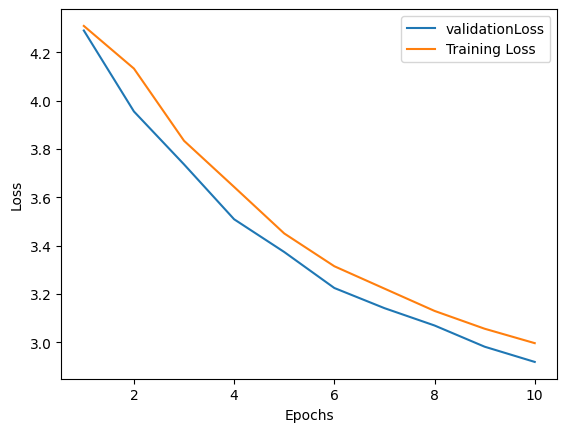

In [ ]:
training_loss = history1.history['loss']
validation_loss = history1.history['val_loss']
# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the loss curves
plt.plot(epochs, validation_loss, label='validationLoss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.plot(epochs, training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.show()

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(75, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 64)          36928     
                                                      

In [ ]:
history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))
model2.save('/content/drive/MyDrive/saved_models/model2.hdf5')

Epoch 1/10
41/41 [==============================] - 16s 346ms/step - loss: 4.2587 - acc: 0.0248 - val_loss: 4.0518 - val_acc: 0.0438
Epoch 2/10
41/41 [==============================] - 15s 364ms/step - loss: 3.9158 - acc: 0.0604 - val_loss: 3.7685 - val_acc: 0.0754
Epoch 3/10
41/41 [==============================] - 14s 346ms/step - loss: 3.6617 - acc: 0.0933 - val_loss: 3.5196 - val_acc: 0.1177
Epoch 4/10
41/41 [==============================] - 28s 694ms/step - loss: 3.4064 - acc: 0.1423 - val_loss: 3.2780 - val_acc: 0.1708
Epoch 5/10
41/41 [==============================] - 19s 475ms/step - loss: 3.1370 - acc: 0.1950 - val_loss: 3.1298 - val_acc: 0.1962
Epoch 6/10
41/41 [==============================] - 14s 344ms/step - loss: 2.9538 - acc: 0.2304 - val_loss: 2.9910 - val_acc: 0.2277
Epoch 7/10
41/41 [==============================] - 14s 346ms/step - loss: 2.7427 - acc: 0.2774 - val_loss: 2.8245 - val_acc: 0.2638
Epoch 8/10
41/41 [==============================] - 13s 330ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


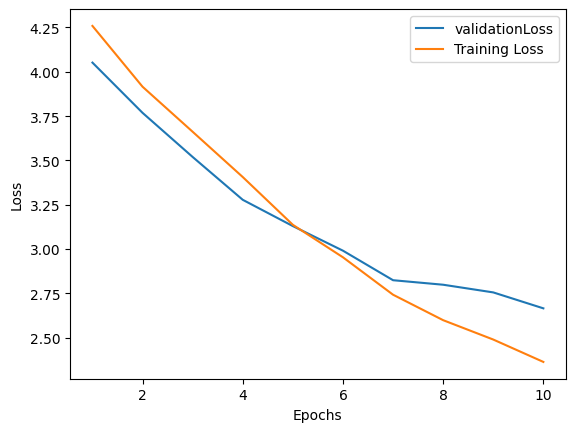

In [ ]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the loss curves
plt.plot(epochs, validation_loss, label='validationLoss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.plot(epochs, training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.show()

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(75, activation = 'softmax'))

model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 5, 5, 64)         

In [ ]:
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))
model3.save('/content/drive/MyDrive/saved_models/model3.hdf5')

Epoch 1/10
41/41 [==============================] - 5s 108ms/step - loss: 4.2937 - acc: 0.0212 - val_loss: 4.2046 - val_acc: 0.0438
Epoch 2/10
41/41 [==============================] - 8s 188ms/step - loss: 3.9600 - acc: 0.0700 - val_loss: 3.6723 - val_acc: 0.1031
Epoch 3/10
41/41 [==============================] - 5s 110ms/step - loss: 3.5026 - acc: 0.1369 - val_loss: 3.3964 - val_acc: 0.1592
Epoch 4/10
41/41 [==============================] - 9s 231ms/step - loss: 3.2272 - acc: 0.1916 - val_loss: 3.2270 - val_acc: 0.2015
Epoch 5/10
41/41 [==============================] - 7s 157ms/step - loss: 2.9739 - acc: 0.2520 - val_loss: 3.0580 - val_acc: 0.2454
Epoch 6/10
41/41 [==============================] - 5s 122ms/step - loss: 2.7386 - acc: 0.3031 - val_loss: 2.9320 - val_acc: 0.2731
Epoch 7/10
41/41 [==============================] - 6s 137ms/step - loss: 2.5443 - acc: 0.3478 - val_loss: 2.7883 - val_acc: 0.3008
Epoch 8/10
41/41 [==============================] - 4s 103ms/step - loss: 2.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


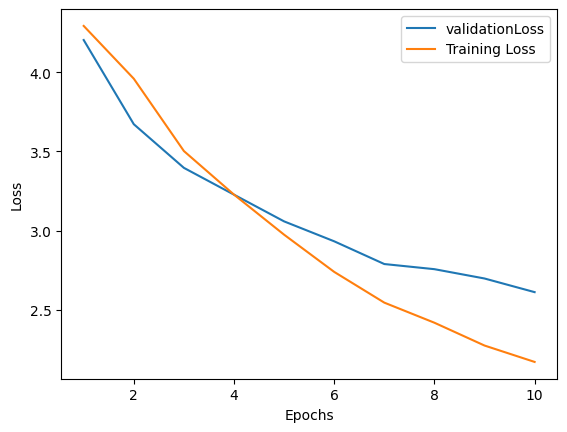

In [ ]:
training_loss = history3.history['loss']
validation_loss = history3.history['val_loss']
# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the loss curves
plt.plot(epochs, validation_loss, label='validationLoss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.plot(epochs, training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.show()

In [ ]:
y_test_cat = np.argmax(y_test_cat, axis=1)

In [ ]:
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/saved_models/model1.hdf5')
model2 = load_model('/content/drive/MyDrive/saved_models/model2.hdf5')
model3 = load_model('/content/drive/MyDrive/saved_models/model3.hdf5')

models = [model1, model2, model3]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

# Get individual predictions for each model
prediction1 = np.argmax(model1.predict(X_test), axis=1)
prediction2 = np.argmax(model2.predict(X_test), axis=1)
prediction3 = np.argmax(model3.predict(X_test), axis=1)

accuracy1 = accuracy_score(y_test_cat, prediction1)
accuracy2 = accuracy_score(y_test_cat, prediction2)
accuracy3 = accuracy_score(y_test_cat, prediction3)
ensemble_accuracy = accuracy_score(y_test_cat, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

41/41 [==============================] - 0s 8ms/step
Accuracy Score for model1 =  0.24153846153846154
Accuracy Score for model2 =  0.31076923076923074
Accuracy Score for model3 =  0.32461538461538464
Accuracy Score for average ensemble =  0.3576923076923077
